In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import LambdaLR
from transformer_for_k_fac_variant import MultiHeadAttention, FeedForward, EncoderBlock, Encoder, DecoderBlock, Decoder, PositionalEncoding  
from copy import deepcopy
import time 
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "drive/MyDrive/WMT14/English-German/"

## Blocks check

In [ ]:
device

device(type='cuda')

In [ ]:
batch_size, length, dmodel, dk, dv, dff, exp_eps = 16, 28, 256, 32, 32, 1024, 0.8
tensor = torch.randn(batch_size, length, dmodel).to(device)

model = MultiHeadAttention(exp_eps, dmodel=dmodel, dk=dk, dv=dv, qkv=True)
model.to(device)
start = time.time()
curr = model(tensor, has_mask=True)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1005.)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.1408557891845703, torch.Size([16, 28, 256]))

In [ ]:
batch_size, length, dmodel, dk, dv, dff, exp_eps = 16, 28, 256, 32, 32, 1024, 0.8
tensor_q = torch.randn(batch_size, length, dmodel).to(device)
tensor_kv = torch.randn(batch_size, length+2, dmodel).to(device)

model = MultiHeadAttention(exp_eps, dmodel=dmodel, dk=dk, dv=dv, qkv=False)
model.to(device)
start = time.time()
curr = model(tensor_kv, queries=tensor_q)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.007235527038574219, torch.Size([16, 28, 256]))

In [ ]:
model = FeedForward(exp_eps, dmodel=dmodel, dff=dff)
model.to(device)
start = time.time()
curr = model(tensor)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.047350168228149414, torch.Size([16, 28, 256]))

In [ ]:
model = EncoderBlock(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
start = time.time()
curr = model(tensor)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.0660712718963623, torch.Size([16, 28, 256]))

In [ ]:
model = Encoder(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
start = time.time()
curr = model(tensor)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.16024994850158691, torch.Size([16, 28, 256]))

In [ ]:
model = DecoderBlock(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
tensor_y = torch.randn(batch_size, length+3, dmodel).to(device)
start = time.time()
curr = model(tensor, tensor_y)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.047382354736328125, torch.Size([16, 31, 256]))

In [ ]:
model = Decoder(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
start = time.time()
curr = model(tensor, tensor_y)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.1821904182434082, torch.Size([16, 31, 256]))

In [ ]:
model = PositionalEncoding(length, dmodel)
model.to(device)
start = time.time()
curr = model(tensor)
end = time.time()
end - start, curr.size()

(0.0039031505584716797, torch.Size([16, 28, 256]))

## Word2Vec Matrix

In [ ]:
from gensim.models import Word2Vec
from tqdm import tqdm_notebook

In [ ]:
dmodel = 256
model = Word2Vec.load(path + 'word2vec_en' + str(dmodel) + '.model')
vocab_size = len(model.wv.vocab)
weights_matrix_en = np.zeros((vocab_size, dmodel))
en = {}
for i, x in tqdm_notebook(enumerate(model.wv.vocab.keys())):
    weights_matrix_en[i] = model[x]  
    en[x] = i
weights_matrix_en.shape, len(en)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


((26034, 256), 26034)

In [ ]:
model = Word2Vec.load(path + 'word2vec_de' + str(dmodel) + '.model')
vocab_size = len(model.wv.vocab)
weights_matrix_de = np.zeros((vocab_size, dmodel))
de = {}
for i, x in tqdm_notebook(enumerate(model.wv.vocab.keys())):
    weights_matrix_de[i] = model[x]   
    de[x] = i
weights_matrix_de.shape, len(de)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


((31797, 256), 31797)

## Model

In [ ]:
dmodel, dk, dv, dff

(256, 32, 32, 1024)

In [ ]:
class Model(nn.Module):
    def __init__(self, weights_matrix_en, weights_matrix_de, exp_eps, h=8, dmodel=512, dk=64, dv=64, dff=2048, pdropout=0.1):
        super().__init__()
        self.dmodel = dmodel
        self.pdropout = pdropout
        self.encoder = Encoder(exp_eps, h, dmodel, dk, dv, dff, pdropout)
        self.decoder = Decoder(exp_eps, h, dmodel, dk, dv, dff, pdropout)
        self.input_embedding = torch.tensor(weights_matrix_en, dtype=torch.float32, requires_grad=False).to(device)
        self.output_embedding = torch.tensor(weights_matrix_de, dtype=torch.float32, requires_grad=False).to(device)
    
    def forward(self, inputs, outputs):
        # input embedding
        x_emb = torch.matmul(inputs, self.input_embedding) * np.sqrt(self.dmodel)
        x_positionalenc = PositionalEncoding(x_emb.size()[1], self.dmodel)(x_emb) 
        x_dropout = nn.Dropout(p=self.pdropout)(x_positionalenc)
        x_enc = self.encoder(x_dropout)
        # output embedding
        y_emb = torch.matmul(outputs, self.output_embedding) * np.sqrt(self.dmodel)
        y_positionalenc = PositionalEncoding(outputs.size()[1], self.dmodel)(y_emb)
        y_dropout = nn.Dropout(p=self.pdropout)(y_positionalenc)
        dec = self.decoder(x_enc, y_dropout)
        # linear 
        current = torch.matmul(dec, torch.transpose(self.output_embedding, 0, 1))
        result = nn.LogSoftmax(dim=2)(current)
        return result

In [ ]:
tensor_x = torch.randn(batch_size, length, weights_matrix_en.shape[0]).to(device)
tensor_y = torch.randn(batch_size, length+2, weights_matrix_de.shape[0]).to(device)
model = Model(weights_matrix_en, weights_matrix_de, exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
start = time.time()
curr = model(tensor_x, tensor_y)
end = time.time()
end - start, curr.size()

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:795: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


(0.4429361820220947, torch.Size([16, 30, 31797]))

In [ ]:
from prettytable import PrettyTable

def count_parameters(model, print_table=True):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    if print_table:
        print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
       
res = count_parameters(model, print_table=False)
res_enc = count_parameters(Encoder(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff), print_table=False)
res_dec = count_parameters(Decoder(exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff), print_table=False)
res / 10**6, res_enc / 10**6, res_dec / 10**6, (res_enc + res_dec) / res

Total Trainable Params: 5512704
Total Trainable Params: 2363136
Total Trainable Params: 3149568


(5.512704, 2.363136, 3.149568, 1.0)

## Training supports

In [11]:
from training import to_one_hot, get_batch, read_file, read_files, shuffle

In [ ]:
batch = [['the', 'result'], ['future', 'efforts']]
batch, batch_idx, mask_mod = to_one_hot(batch, np.ones((2, 2)), en)
batch.shape, batch_idx.shape, mask_mod.shape, batch_idx, mask_mod, batch.sum(-1)

((2, 2, 26034), (2, 2), (2, 2), array([[   4.,  902.],
        [1167., 1652.]]), array([[1., 1.],
        [1., 1.]]), array([[1., 1.],
        [1., 1.]]))

In [ ]:
en_sent, de_sent, en_lens, de_lens = read_files(path + 'valid_prep.en', path + 'valid_prep.de')
len(en_sent), len(de_sent), len(en_lens), len(de_lens)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(40031, 40031, 40031, 40031)

In [ ]:
en_lens.mean(), de_lens.mean()

(27.839449426694312, 28.229197372036673)

In [ ]:
idx = 10**4+1
en_sent[idx], de_sent[idx]

(['<start>', 'i', 'would', 'see', 'it', 'differently', '<end>'],
 ['<start>', 'ich', 'sehe', 'das', 'anders', '<end>'])

In [ ]:
en_sent_reordered, de_sent_reordered, en_lens_reordered, de_lens_reordered = shuffle(en_sent, de_sent, en_lens, de_lens)

In [ ]:
en_sent[idx], de_sent[idx]

(['<start>', 'i', 'would', 'see', 'it', 'differently', '<end>'],
 ['<start>', 'ich', 'sehe', 'das', 'anders', '<end>'])

In [ ]:
en_sent_reordered[idx], de_sent_reordered[idx]

(['<start>',
  'during',
  'this',
  'phase',
  'state',
  'interests',
  'and',
  'sporting',
  'interests',
  'in',
  'the',
  'federal',
  'republic',
  'again',
  'fell',
  'under',
  'one',
  'remit',
  '<end>'],
 ['<start>',
  'in',
  'dieser',
  'phase',
  'kamen',
  'staatliche',
  'und',
  'sportliche',
  'interessen',
  'in',
  'der',
  'bundesrepublik',
  'wieder',
  'zur',
  'deckung',
  '<end>'])

In [ ]:
idx = 500
get_batch(en_sent_reordered[idx:idx+5], en_lens_reordered[idx:idx+5])

([['<start>', 'are', 'both', 'sides', 'equally', 'to', 'blame', '<end>'],
  ['<start>',
   'this',
   'is',
   'international',
   'maritime',
   'law',
   '<end>',
   '<end>'],
  ['<start>', 'i', 'therefore', 'voted', 'in', 'favour', '<end>', '<end>'],
  ['<start>',
   'finally',
   'the',
   'eurostat',
   'affair',
   '<end>',
   '<end>',
   '<end>'],
  ['<start>', 'we', 'have', 'noted', 'your', 'remarks', '<end>', '<end>']],
 array([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.]]))

In [ ]:
idx = 500
get_batch(de_sent_reordered[idx:idx+5], de_lens_reordered[idx:idx+5])

([['<start>',
   'tragen',
   'beide',
   'seiten',
   'gleichermaßen',
   'schuld',
   '<end>',
   '<end>',
   '<end>'],
  ['<start>',
   'das',
   'ist',
   'internationales',
   'se@@',
   'ere@@',
   'cht',
   '<end>',
   '<end>'],
  ['<start>',
   'daher',
   'habe',
   'ich',
   'mit',
   'ja',
   'gestimmt',
   '<end>',
   '<end>'],
  ['<start>',
   'zum',
   'schluss',
   'die',
   'eurostat',
   '@-@',
   'aff@@',
   'äre',
   '<end>'],
  ['<start>',
   'wir',
   'haben',
   'das',
   'zur',
   'kenntnis',
   'genommen',
   '<end>',
   '<end>']],
 array([[1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0.]]))

## Training

In [ ]:
def get_unk_idx(lang):
    return lang['<unk>']

unk_idx = get_unk_idx(de)
unk_idx

12566

In [ ]:
def compose_params(model):
    params_dict = {}
    for name, parameter in model.named_parameters():
        curr = name.split('.')
        btype = curr[2]
        bname = '.'.join(curr[1:3])

        if btype == 'feedforward':
            bname += '.' + curr[3]
            if curr[4] == 'linear':
                inner_type = curr[5]
            else:
                inner_type = curr[4]
        else:
            if curr[3] == 'wo':
                bname += '.' + curr[3]
                inner_type = curr[4]
            else:    
                bname += '.' + curr[4] + '.' + curr[3]
                inner_type = curr[5]
            
        if bname not in params_dict.keys():
            params_dict[bname] = {}
        params_dict[bname][inner_type] = parameter

    params = []
    for x in params_dict.keys():
        curr = params_dict[x]
        btype = x.split('.')
        if btype[1] == 'feedforward':
            params.append({'params': [curr['forward_st'], curr['backward_st'], curr['weight'], curr['bias']], 'name': btype[1]})
        else:
            if btype[2] == 'wo':
                params.append({'params': [curr['forward_st'], curr['backward_st'], curr['linear']], 'name': 'wo'})
            else:
                curr_params = []
                if btype[2] == '0':
                    curr_params.append(curr['forward_st'])
                curr_params.append(curr['backward_st']) 
                curr_name = ""   
                for y in ['qlinear', 'klinear', 'vlinear']:
                    if y in curr.keys():
                        curr_name += y[0]
                        curr_params.append(curr[y])
                params.append({'params': curr_params, 'name': curr_name})  
    return params                           

In [ ]:
from torch.optim.optimizer import Optimizer


# в рамках одного класса описаны оба варианта обновления learning_rate 
# для смены варианта необходимо раскомментировать часть кода
class MyOptimizer(Optimizer):
    def __init__(self, params, lr_w=1e-5, lr_b=1e-5, lmbd=1e-5, mm=0.8, st_bd=[1., 1.], lr_bd=[1., 1.]):
        defaults = {'lr_w': lr_w, 'lr_b': lr_b, 'lmbd': lmbd, 'mm': mm}
        self.st_bd = st_bd
        self.lr_bd = lr_bd
        #self.epoch = 0
        self.a_st, self.g_st, self.w_st, self.b_st = [], [], [], []
        self.lmbds, self.lrs_w, self.lrs_b = [lmbd, ], [lr_w, ], [lr_b, ]
        super(MyOptimizer, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()
        
        curr_st = []
        forward_st_q = torch.zeros(dmodel, dmodel).to(device)
        forward_st_kv = torch.zeros(dmodel, dmodel).to(device)
        for group in self.param_groups:
            curr_type = ''
            if group['name'] == 'feedforward':
                curr_type = 'feedforward'
                a, g, w, b = group['params']
                state_w, state_b = self.state[w], self.state[b]
                if len(state_w) == 0:
                    state_w['step'] = 0
                    state_w['grad'] = torch.zeros_like(w.data)
                    state_w['momentum'] = torch.zeros_like(w.data)
                if len(state_b) == 0:
                    state_b['grad'] = torch.zeros_like(b.data)  
                    state_b['momentum'] = torch.zeros_like(b.data)  
                step = state_w['step']
                w_grad = state_w['grad']
                b_grad = state_b['grad']
                w_momentum = state_w['momentum']
                b_momentum = state_b['momentum']
                if step % 2 == 0:
                    w_grad.mul_(0.).add_(1., w.grad.data)
                    b_grad.mul_(0.).add_(1., b.grad.data)
                else:
                    curr_type += '+'
                    b_grad_tensor = torch.diag(b_grad)
                    grad = torch.cat([w_grad, b_grad_tensor], 1)
                    pi = torch.sqrt((torch.trace(a) / (a.size(0) + 1)) / (torch.trace(g) / g.size(0)))
                    a1 = torch.inverse(a + group['lmbd'] * pi * torch.eye(a.size()[0]).to(device))
                    g1 = torch.inverse(g + group['lmbd'] / pi * torch.eye(g.size()[0]).to(device))
                    res = torch.matmul(torch.matmul(g1, grad), a1)
                    bd = w.size()[1]
                    a_st = torch.mean(torch.abs(torch.diagonal(a))).item()
                    g_st = torch.mean(torch.abs(torch.diagonal(g))).item()
                    pi_lmbd_st = ((group['lmbd'] * pi).item(), (group['lmbd'] / pi).item())
                    res_w_st = (group['lr_w'] * torch.mean(torch.abs(res[:, :bd]))).item()
                    res_b_st = (group['lr_b'] * torch.mean(torch.abs(torch.diagonal(res[:, bd:])))).item()
                    w_st = torch.mean(torch.abs(group['params'][2].data)).item()
                    b_st = torch.mean(torch.abs(group['params'][3].data)).item()
                    curr_st.append([a_st / pi_lmbd_st[0], g_st / pi_lmbd_st[1], w_st / res_w_st, b_st / res_b_st, 1.])
                    eps = min(1. - 1./(step//2 + 1.), group['mm'])
                    w_momentum.mul_(eps).add_((1. - eps) * group['lr_w'], res[:, :bd])
                    b_momentum.mul_(eps).add_((1. - eps) * group['lr_b'], torch.diagonal(res[:, bd:]))    
                    group['params'][2].data.add_(-1., w_momentum)
                    group['params'][3].data.add_(-1., b_momentum)
                state_w['step'] += 1 

            if group['name'] == 'wo' or group['name'] == 'q':
                curr_type = group['name']
                if len(group['params']) == 3:
                    a, g, w = group['params']
                    if group['name'] == 'q':
                        forward_st_q.mul_(0.).add_(1., a)
                else:
                    g, w = group['params']
                    a = forward_st_q   
                state_w = self.state[w]
                if len(state_w) == 0:
                    state_w['step'] = 0
                    state_w['grad'] = torch.zeros_like(w.data)
                    state_w['momentum'] = torch.zeros_like(w.data)
                step = state_w['step']
                grad = state_w['grad']
                momentum = state_w['momentum']
                if step % 2 == 0:    
                    grad.mul_(0.).add_(1., w.grad.data)
                else:
                    curr_type += '+'
                    pi = torch.sqrt((torch.trace(a) / (a.size(0) + 1)) / (torch.trace(g) / g.size(0)))
                    a1 = torch.inverse(a + group['lmbd'] * pi * torch.eye(a.size()[0]).to(device))
                    g1 = torch.inverse(g + group['lmbd'] / pi * torch.eye(g.size()[0]).to(device))
                    res = torch.matmul(torch.matmul(g1, grad), a1)
                    a_st = torch.mean(torch.abs(torch.diagonal(a))).item()
                    g_st = torch.mean(torch.abs(torch.diagonal(g))).item()
                    pi_lmbd_st = ((group['lmbd'] * pi).item(), (group['lmbd'] / pi).item())
                    res_st = (group['lr_w'] * torch.mean(torch.abs(res))).item()
                    w_st = torch.mean(torch.abs(group['params'][-1].data)).item()
                    curr_st.append([a_st / pi_lmbd_st[0], g_st / pi_lmbd_st[1], w_st / res_st, 0, 0.])
                    eps = min(1. - 1./(step//2 + 1.), group['mm'])
                    momentum.mul_(eps).add_((1 - eps) * group['lr_w'], res)
                    group['params'][-1].data.add_(-1., momentum)
                state_w['step'] += 1 

            if group['name'] == 'kv':
                curr_type = 'kv'
                if len(group['params']) == 4:
                    a, g, wk, wv = group['params']
                    forward_st_kv.mul_(0.).add_(1., a)
                else:
                    g, wk, wv = group['params']
                    a = forward_st_kv
                state_wk = self.state[wk]
                state_wv = self.state[wv]
                if len(state_wk) == 0:
                    state_wk['step'] = 0
                    state_wk['grad'] = torch.zeros_like(wk.data)
                    state_wk['momentum'] = torch.zeros_like(wk.data)
                if len(state_wv) == 0:
                    state_wv['grad'] = torch.zeros_like(wv.data)
                    state_wv['momentum'] = torch.zeros_like(wv.data)    
                step = state_wk['step']
                grad_wk = state_wk['grad']
                grad_wv = state_wv['grad']
                momentum_wk = state_wk['momentum']
                momentum_wv = state_wv['momentum']
                if step % 2 == 0:    
                    grad_wk.mul_(0.).add_(1., wk.grad.data)
                    grad_wv.mul_(0.).add_(1., wv.grad.data)
                else:
                    curr_type += '+'
                    pi = torch.sqrt((torch.trace(a) / (a.size(0) + 1)) / (torch.trace(g) / g.size(0)))
                    a1 = torch.inverse(a + group['lmbd'] * pi * torch.eye(a.size()[0]).to(device))
                    g1 = torch.inverse(g + group['lmbd'] / pi * torch.eye(g.size()[0]).to(device))
                    grad = torch.cat([grad_wk, grad_wv], 0)
                    res = torch.matmul(torch.matmul(g1, grad), a1)
                    a_st = torch.mean(torch.abs(torch.diagonal(a))).item()
                    g_st = torch.mean(torch.abs(torch.diagonal(g))).item()
                    pi_lmbd_st = ((group['lmbd'] * pi).item(), (group['lmbd'] / pi).item())
                    res_st = (group['lr_w'] * torch.mean(torch.abs(res))).item()
                    w_st = torch.mean(torch.abs(torch.cat(group['params'][-2:], 0))).item()
                    curr_st.append([a_st / pi_lmbd_st[0], g_st / pi_lmbd_st[1], w_st / res_st, 0, 0.])
                    bd = grad_wq.size()[0]
                    eps = min(1. - 1./(step//2 + 1.), group['mm'])
                    momentum_wk.mul_(eps).add_((1 - eps) * group['lr_w'], res[:bd, :])
                    momentum_wv.mul_(eps).add_((1 - eps) * group['lr_w'], res[bd:, :])
                    group['params'][-2].data.add_(-1., momentum_wk)
                    group['params'][-1].data.add_(-1., momentum_wv)
                state_wk['step'] += 1  

            if group['name'] == 'qkv':
                curr_type = 'qkv'
                if len(group['params']) == 5:
                    a, g, wq, wk, wv = group['params']
                    forward_st_kv.mul_(0.).add_(1., a)
                else:
                    g, wq, wk, wv = group['params']
                    a = forward_st_kv
                state_wq = self.state[wq]
                state_wk = self.state[wk]
                state_wv = self.state[wv]
                if len(state_wq) == 0:
                    state_wq['step'] = 0
                    state_wq['grad'] = torch.zeros_like(wq.data)
                    state_wq['momentum'] = torch.zeros_like(wq.data)
                if len(state_wk) == 0:
                    state_wk['grad'] = torch.zeros_like(wk.data)
                    state_wk['momentum'] = torch.zeros_like(wk.data)
                if len(state_wv) == 0:
                    state_wv['grad'] = torch.zeros_like(wv.data)
                    state_wv['momentum'] = torch.zeros_like(wv.data)       
                step = state_wq['step']
                grad_wq = state_wq['grad']
                grad_wk = state_wk['grad']
                grad_wv = state_wv['grad']
                momentum_wq = state_wq['momentum']
                momentum_wk = state_wk['momentum']
                momentum_wv = state_wv['momentum']
                if step % 2 == 0:    
                    grad_wq.mul_(0.).add_(1., wq.grad.data)
                    grad_wk.mul_(0.).add_(1., wk.grad.data)
                    grad_wv.mul_(0.).add_(1., wv.grad.data)
                else:
                    curr_type += '+'
                    pi = torch.sqrt((torch.trace(a) / (a.size(0) + 1)) / (torch.trace(g) / g.size(0)))
                    a1 = torch.inverse(a + group['lmbd'] * pi * torch.eye(a.size()[0]).to(device))
                    g1 = torch.inverse(g + group['lmbd'] / pi * torch.eye(g.size()[0]).to(device))
                    grad = torch.cat([grad_wq, grad_wk, grad_wv], 0)
                    res = torch.matmul(torch.matmul(g1, grad), a1)
                    a_st = torch.mean(torch.abs(torch.diagonal(a))).item()
                    g_st = torch.mean(torch.abs(torch.diagonal(g))).item()
                    pi_lmbd_st = ((group['lmbd'] * pi).item(), (group['lmbd'] / pi).item())
                    res_st = (group['lr_w'] * torch.mean(torch.abs(res))).item()
                    w_st = torch.mean(torch.abs(torch.cat(group['params'][-3:], 0))).item()
                    curr_st.append([a_st / pi_lmbd_st[0], g_st / pi_lmbd_st[1], w_st / res_st, 0, 0.])
                    bd = grad_wq.size()[0]
                    eps = min(1. - 1./(step//2 + 1.), group['mm'])
                    momentum_wq.mul_(eps).add_((1 - eps) * group['lr_w'], res[:bd, :])
                    momentum_wk.mul_(eps).add_((1 - eps) * group['lr_w'], res[bd:2*bd, :])
                    momentum_wv.mul_(eps).add_((1 - eps) * group['lr_w'], res[2*bd:, :])
                    group['params'][-3].data.add_(-1., momentum_wq)
                    group['params'][-2].data.add_(-1., momentum_wk)
                    group['params'][-1].data.add_(-1., momentum_wv)
                state_wq['step'] += 1      
            if curr_type == '':
                print('error')
                
        curr_st = np.array(curr_st)
        if len(curr_st) > 0:
            mask = (curr_st[:, -1] > 0.)
            mins = np.hstack([curr_st[:, :3].min(0), np.min(curr_st[:, -2][mask])]) 
            maxs = np.hstack([curr_st[:, :3].max(0), np.max(curr_st[:, -2][mask])])
            means = np.hstack([curr_st[:, :3].mean(0), np.mean(curr_st[:, -2][mask])])
            self.a_st.append([mins[0], means[0], maxs[0]])
            self.g_st.append([mins[1], means[1], maxs[1]])
            self.w_st.append([mins[2], means[2], maxs[2]])
            self.b_st.append([mins[3], means[3], maxs[3]])

            w_coef = 2. * (self.w_st[-1][0] > self.lr_bd[1]) + 0.5 * (self.w_st[-1][0] < self.lr_bd[0]) + 1. * (self.w_st[-1][0] <= self.lr_bd[1]) * (self.w_st[-1][0] >= self.lr_bd[0])
            b_coef = 2. * (self.b_st[-1][0] > self.lr_bd[1]) + 0.5 * (self.b_st[-1][0] < self.lr_bd[0]) + 1. * (self.b_st[-1][0] <= self.lr_bd[1]) * (self.b_st[-1][0] >= self.lr_bd[0])
            
            lmbd_coef = 1.
            left = 0.85 * self.st_bd[0] + 0.15 * self.st_bd[1]
            right = 0.15 * self.st_bd[0] + 0.85 * self.st_bd[1]
            if (self.a_st[-1][0] > right and self.g_st[-1][0] > right):
                lmbd_coef = right / (0.5 * self.st_bd[1] + 0.5 * self.st_bd[0])  
            if (self.a_st[-1][0] < left and self.g_st[-1][0] < left):
                lmbd_coef = left / (0.5 * self.st_bd[1] + 0.5 * self.st_bd[0])      
            #lr_w = min(1e-12 * (self.epoch+1)**0.7 * np.exp(self.epoch * 1. * 1e-2), 1e-12 * 2**13)
            #lr_b = min(5e-14 * (self.epoch+1)**1. * np.exp(self.epoch * 1.5 * 1e-2), 5e-14 * 2**16)
            #self.epoch += 1     

            for group in self.param_groups:
                group['lr_w'] = min(1e-12 * 2**13, group['lr_w'] * w_coef)
                group['lr_b'] = min(5e-14 * 2**16, group['lr_b'] * b_coef) 
                #group['lr_w'] = lr_w
                #group['lr_b'] = lr_b
                group['lmbd'] *= lmbd_coef
            self.lmbds.append(self.param_groups[0]['lmbd'])
            self.lrs_w.append(self.param_groups[0]['lr_w'])
            self.lrs_b.append(self.param_groups[0]['lr_b'])

In [ ]:
from torch.distributions.categorical import Categorical

def torch_to_one_hot(batch, vocab_size):
    batch_size, length = batch.size()
    batch_one_hot = torch.zeros((batch_size, length, vocab_size))
    for i in range(batch_size):
        for j in range(length):
            batch_one_hot[i, j, batch[i, j]] += 1
    return batch_one_hot.to(device)  

In [ ]:
batch_size = 4
global_steps = 256 * 25 
accumulation_steps = 1 
epsls = 0.1
exp_eps = 0.95
vocab_size = weights_matrix_de.shape[0]

model = Model(weights_matrix_en, weights_matrix_de, exp_eps, dmodel=dmodel, dk=dk, dv=dv, dff=dff)
model.to(device)
params = compose_params(model)

optimizer = MyOptimizer(params, lr_w=1e-12, lr_b=5e-14, lmbd=5e-7, mm=0.85, st_bd=[4., 8.], lr_bd=[2., 20.])

running_loss = 0.
running_cleared_loss = 0.
running_accr = 0.
losses, cleared_losses, accrs, tms = [], [], [], []
f_st = open('stats.txt', 'w')
subpath = path + 'train_prep/'
init_step = 0
ix, load_file, curr_file, total_files = 0, False, 0, 52

In [ ]:
start_time = time.time()
for step in range(init_step, global_steps * accumulation_steps):
    if load_file:
        f_en, f_de = subpath + str(curr_file) + '.en', subpath + str(curr_file) + '.de'
        en_sent, en_lens = read_file(f_en)
        de_sent, de_lens = read_file(f_de)
        curr_file = (curr_file+1) % total_files
        ix, load_file = 0, False
    
    batch_en, mask_en = get_batch(en_sent[ix:ix+batch_size], en_lens[ix:ix+batch_size])
    batch_de, mask_de = get_batch(de_sent[ix:ix+batch_size], de_lens[ix:ix+batch_size])
    
    batch_one_hot_en, _, _ = to_one_hot(batch_en, mask_en, en)
    batch_one_hot_de, batch_idx_de, mask_mod_de = to_one_hot(batch_de, mask_de, de)
    batch_one_hot_en_dv = torch.tensor(batch_one_hot_en, dtype=torch.float32).to(device)
    batch_one_hot_de_dv = torch.tensor(batch_one_hot_de, dtype=torch.float32).to(device)
    mask_mod_de_dv = torch.tensor(mask_mod_de[:, 1:], dtype=torch.float32).to(device)
    
    optimizer.zero_grad()
    outputs = model(batch_one_hot_en_dv, batch_one_hot_de_dv[:, :-1, :])
    
    # outputs.shape = (batch_size, length, vocab_size)
    smoothed_de = (1 - epsls) * batch_one_hot_de_dv[:, 1:, :] + epsls / vocab_size
    cross_entropy_vals = -outputs * smoothed_de
    cleared_cross_entropy_vals = -outputs * batch_one_hot_de_dv[:, 1:, :]
    # cross_entropy_vals.shape = (batch_size, length, vocab_size)
    cross_entropy = torch.sum(cross_entropy_vals, 2)
    cleared_cross_entropy = torch.sum(cleared_cross_entropy_vals, 2)
    # mask_de.shape = (batch_size, length)
    # for not include loss for <unk> tokens and added in get_batch <end> tokens:
    cross_entropy_filtered = cross_entropy * mask_mod_de_dv
    cleared_cross_entropy_filtered = cleared_cross_entropy * mask_mod_de_dv
    loss = torch.sum(cross_entropy_filtered) / torch.sum(mask_mod_de_dv)
    cleared_loss = torch.sum(cleared_cross_entropy_filtered) / torch.sum(mask_mod_de_dv)
          
    pred_values = torch.argmax(outputs, 2) #.shape = (batch_size, length)
    batch_idx_de_dv = torch.tensor(batch_idx_de[:, 1:], dtype=torch.int64).to(device)
    accuracy_vals = (pred_values == batch_idx_de_dv) 
    # accuracy_vals.shape - (batch_size, length)
    accr = torch.sum(accuracy_vals.float() * mask_mod_de_dv) / torch.sum(mask_mod_de_dv) 
        
    loss.backward(retain_graph=True)
    optimizer.step()

    optimizer.zero_grad()
    m = Categorical(logits=outputs)
    sm = m.sample()
    sm_one_hot = torch_to_one_hot(sm, vocab_size)
    # outputs.shape = (batch_size, length, vocab_size)
    smoothed_sm = (1 - epsls) * sm_one_hot + epsls / vocab_size
    cross_entropy_vals_sm = -outputs * smoothed_sm
    # cross_entropy_vals.shape = (batch_size, length, vocab_size)
    cross_entropy_sm = torch.sum(cross_entropy_vals_sm, 2)    
    # mask_de.shape = (batch_size, length)
    # for not include loss for <unk> tokens and added in get_batch <end> tokens:
    loss_sm = torch.mean(cross_entropy_sm) 
    loss_sm.backward()
    optimizer.step()

    running_loss += loss.item()
    running_cleared_loss += cleared_loss.item()
    running_accr += accr.item()

    
    ix += batch_size
    if (ix >= len(en_sent)):
        load_file = True

    if (step+1) % accumulation_steps == 0:
        end_time = time.time()
        tm = end_time - start_time
        running_loss = running_loss / accumulation_steps
        running_cleared_loss = running_cleared_loss / accumulation_steps
        running_accr = running_accr / accumulation_steps
        losses.append(running_loss)
        cleared_losses.append(running_cleared_loss)
        accrs.append(running_accr)
        tms.append(tm)
        print('Step: %d/%d, train loss: %.4f - %.4f, accuracy: %.4f, time: %.4f' % (step//accumulation_steps, global_steps, running_loss, running_cleared_loss, running_accr, tm)) 
        print('Step: %d/%d, train loss: %.4f - %.4f, accuracy: %.4f, time: %.4f' % (step//accumulation_steps, global_steps, running_loss, running_cleared_loss, running_accr, tm), file=f_st) 
        running_loss, running_cleared_loss, running_accr = 0., 0., 0.
        start_time = time.time() 
f_st.close()   

In [ ]:
f = open('inner_stats.txt', 'w')
for dt in [optimizer.a_st, optimizer.g_st, optimizer.lmbds, optimizer.w_st, optimizer.b_st, optimizer.lrs_w, optimizer.lrs_b]:
    for x in dt:
        print(x, end=' ', file=f)
    print(file=f)    
f.close()

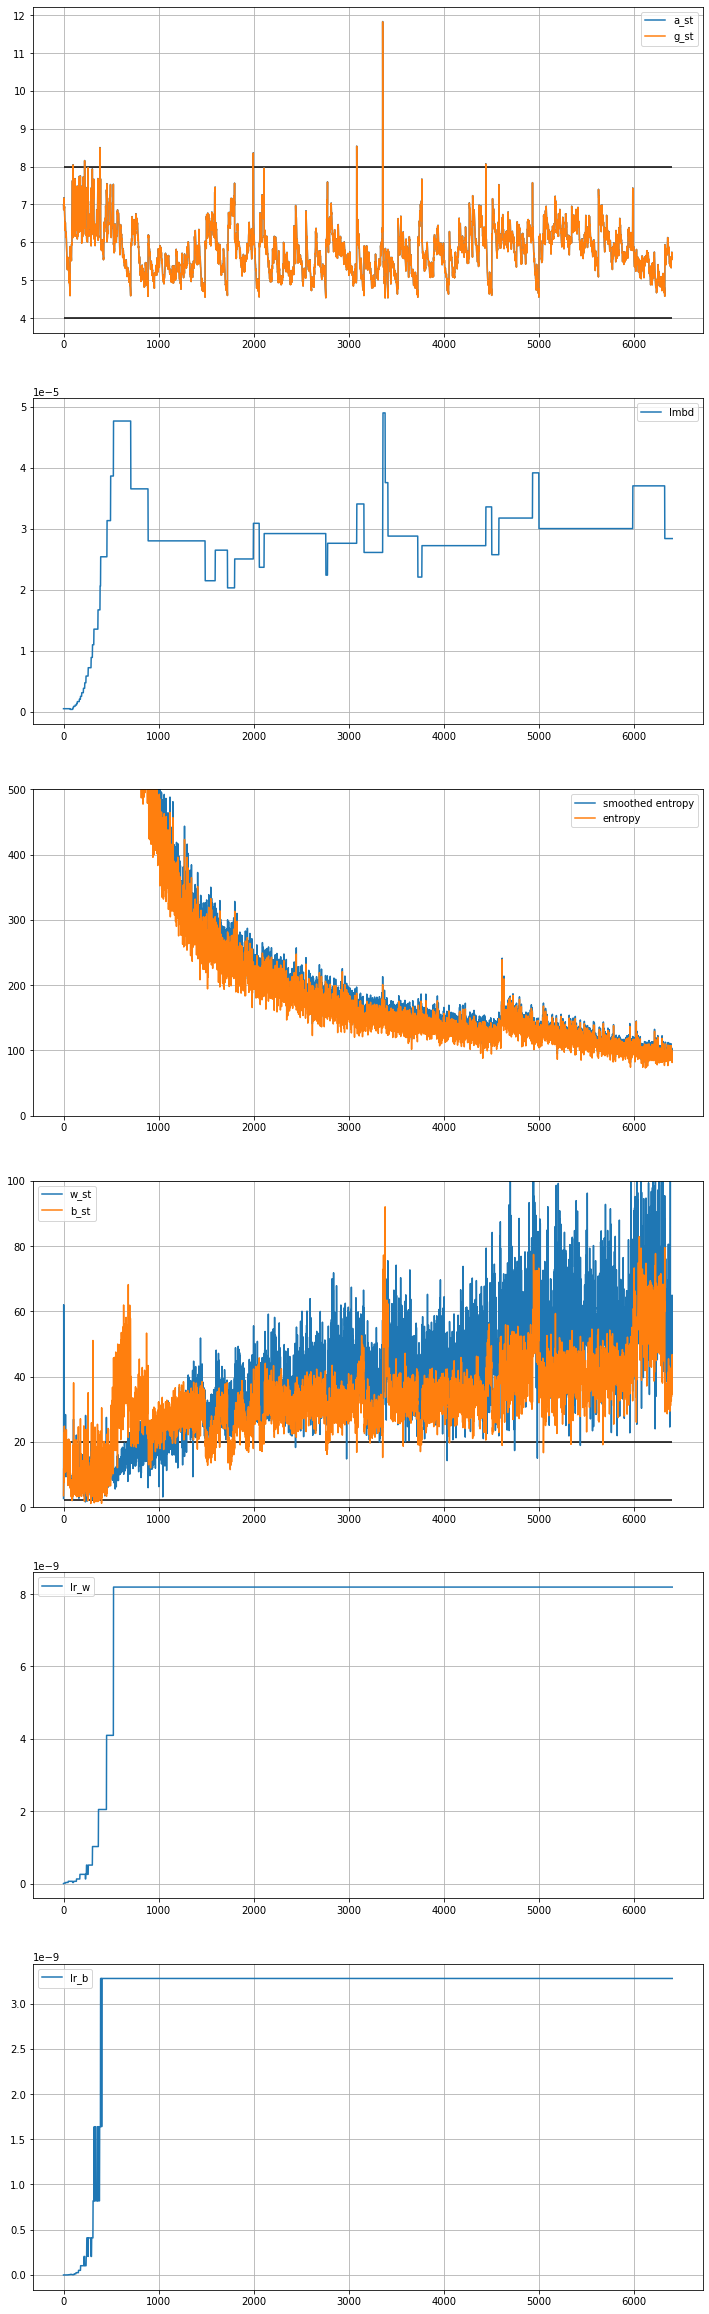

In [ ]:
y = np.array(optimizer.a_st)[:, 0]
grid = np.arange(0, len(y), 1)
plt.figure(figsize=(12, 42))

plt.subplot(6, 1, 1)
plt.plot(grid, y, label='a_st')
plt.plot(grid, np.array(optimizer.g_st)[:, 0], label='g_st')
plt.hlines(4., np.min(grid), np.max(grid))
plt.hlines(8., np.min(grid), np.max(grid))
plt.legend()
plt.grid()

plt.subplot(6, 1, 2)
grid2 = np.arange(0, len(y)+1, 1)
plt.plot(grid2, np.array(optimizer.lmbds), label='lmbd')
plt.legend()
plt.grid()

plt.subplot(6, 1, 3)
plt.plot(grid, losses, label='smoothed entropy')
plt.plot(grid, cleared_losses, label='entropy')
plt.grid()
plt.legend()
plt.ylim([0., 500])


plt.subplot(6, 1, 4)
plt.plot(grid, np.array(optimizer.w_st)[:, 0], label='w_st')
plt.plot(grid, np.array(optimizer.b_st)[:, 0], label='b_st')
plt.hlines(2., np.min(grid), np.max(grid))
plt.hlines(20., np.min(grid), np.max(grid))
plt.ylim([0., 100.])
plt.legend()
plt.grid()

plt.subplot(6, 1, 5)
grid = np.arange(0, len(y)+1, 1)
plt.plot(grid2, np.array(optimizer.lrs_w), label='lr_w')
plt.legend()
plt.grid()

plt.subplot(6, 1, 6)
grid = np.arange(0, len(y)+1, 1)
plt.plot(grid2, np.array(optimizer.lrs_b), label='lr_b')
plt.legend()
plt.grid()
plt.show()

In [ ]:
f_st.close() 

In [ ]:
state = {
        'epoch': step,
        'running_loss': running_loss,
        'running_cleared_loss': running_cleared_loss,
        'running_accr': running_accr,
        'ix': ix,
        'load_file': load_file, 
        'curr_file': curr_file, 
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'a_st': optimizer.a_st,
        'g_st': optimizer.g_st, 
        'w_st': optimizer.w_st,
        'b_st': optimizer.b_st,
        'lrs_w': optimizer.lrs_w,
        'lrs_b': optimizer.lrs_b,
        'lmbds': optimizer.lmbds    
}
savepath='checkpoint.t7'
torch.save(state,savepath)